In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Data Loading and Cleaning:
#1.Load JSON data into Pandas DataFrame.
#2.Clean Price column: strip $ sign and convert to float.
#3.Convert OrderDate to proper datetime format

df = pd.read_json("data.json")
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['Price'] = df['Price'].str.strip("$").astype(float)

In [57]:
#Feature Engineering:
#1.Create a TotalPrice column = Quantity × Price (float).
#2.Extract additional date features like Year, Month, Quarter from OrderDate for time-series analysis.

df['Total Price'] = df['Quantity'] * df['Price']
df['Year'] = df['OrderDate'].dt.year
df['Month'] = df['OrderDate'].dt.to_period('M')
df['Quarter'] = df['OrderDate'].dt.to_period('Q')

,OrderId,OrderDate,CustomerId,ProductId,Category,Quantity,Price,Region,Total Price,Year,Month,Quarter
0,1,2024-11-02,1,1,Pets,1,7.22,Indonesia,7.22,2024,2024-11,2024Q4
1,2,2024-11-15,2,2,Food - Dairy,2,9.20,Sweden,18.40,2024,2024-11,2024Q4
2,3,2024-06-14,3,3,Food - Breakfast,3,8.53,France,25.59,2024,2024-06,2024Q2
3,4,2024-12-18,4,4,Food - Oils,4,4.42,Philippines,17.68,2024,2024-12,2024Q4
4,5,2025-04-28,5,5,Food - Frozen Foods,5,2.55,Brazil,12.75,2025,2025-04,2025Q2
5,6,2024-06-18,6,6,Food - Pasta,6,2.96,Russia,17.76,2024,2024-06,2024Q2
6,7,2024-12-08,7,7,Home,7,3.62,Democratic Republic of the Congo,25.34,2024,2024-12,2024Q4
7,8,2024-09-16,8,8,Audio,8,3.78,Philippines,30.24,2024,2024-09,2024Q3
8,9,2024-06-27,9,9,Food - Bakery,9,3.09,Indonesia,27.81,2024,2024-06,2024Q2
9,10,2024-06-07,10,10,Food - Spices,10,4.46,China,44.60,2024,2024-06,2024Q2


In [35]:
#Descriptive Analysis (UI-less):
#Calculate KPIs:
  #1.Total sales revenue.
  #2.Number of orders.
  #3.Average order value.

#1.Total Sales Revenue
total_revenue = df['Total Price'].sum()
print(f"Total revenue: {total_revenue}")

#2. Number of Orders
total_orders = df['OrderId'].count()
print(f"Total Orders: {total_orders}")

#3. Average Order Value
average_order_value = total_revenue / total_orders
print(f"Average Order Value: ${average_order_value:.2f}")

Total revenue: 5658.33
Total Orders: 50
Average Order Value: $113.17


In [37]:
#Analyze sales by:
#1.Category (which product categories are generating the most revenue).
#2.Region (top performing regions).
#3.Identify the top customers by total spending.

#1. Category-wise total revenue
category_revenue = df.groupby("Category")["Total Price"].sum().sort_values(ascending=False)
print("Category Revenue:\n", category_revenue)

# 2. Region-wise total revenue
region_revenue = df.groupby("Region")["Total Price"].sum().sort_values(ascending=False)
print("\nRegion Revenue:\n", region_revenue)

#3. Customer-wise revenue
customer_revenue = df.groupby("CustomerId")["Total Price"].sum().sort_values(ascending=False)
print("\nCustomer revenue:", customer_revenue)

Category Revenue:
 Category
Food - Snacks             938.36
Home                      564.95
Kitchen                   473.94
Food - Breakfast          425.92
Food - Frozen Foods       419.14
Pets                      358.78
Food - Beverages          335.82
Food - Prepared Foods     321.48
Clothing - Tops           309.20
Accessories               266.19
Tools                     251.37
Food - Spices             137.33
Food - Seafood            122.46
Food - Meats              117.15
Food - Baking             106.47
Clothing - Outerwear       69.93
Electronics                60.75
Food - Condiments          60.18
Health                     54.04
Clothing - Accessories     40.08
Food - Grains              40.08
Audio                      30.24
Food - Bakery              27.81
Food - Seasonings          26.25
Gaming                     25.74
Food - Dairy               18.40
Food - Pasta               17.76
Food - Oils                17.68
Food - Produce             16.33
Food - Canned G

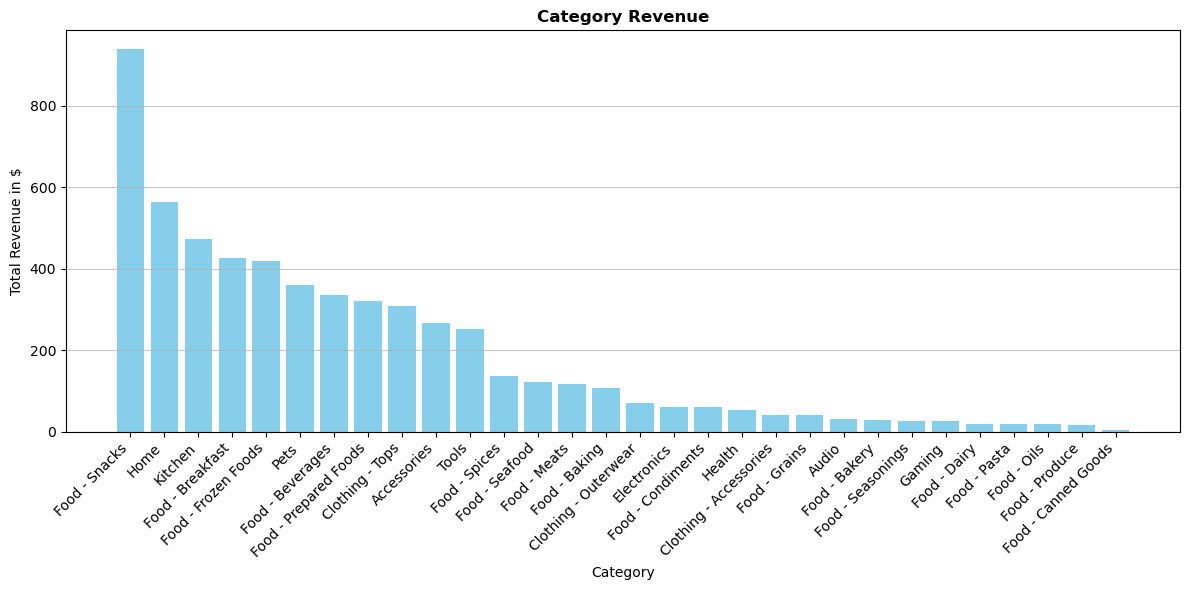

In [55]:
#Visualizations (Matplotlib)
#1.Bar chart: Revenue by Category.
#2.Line chart: Sales over time (monthly/quarterly).
#3.Pie chart: Market share by Region.
#4.Histogram: Distribution of order quantities or prices.
#5.Scatter plot: Quantity vs. Price.

#1. Bar Chart of Revenues by category
plt.figure(figsize=(12,6))
plt.bar(category_revenue.index, category_revenue.values, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Category')
plt.ylabel('Total Revenue in $')
plt.title('Category Revenue', fontweight='bold')
plt.tight_layout()
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.show()

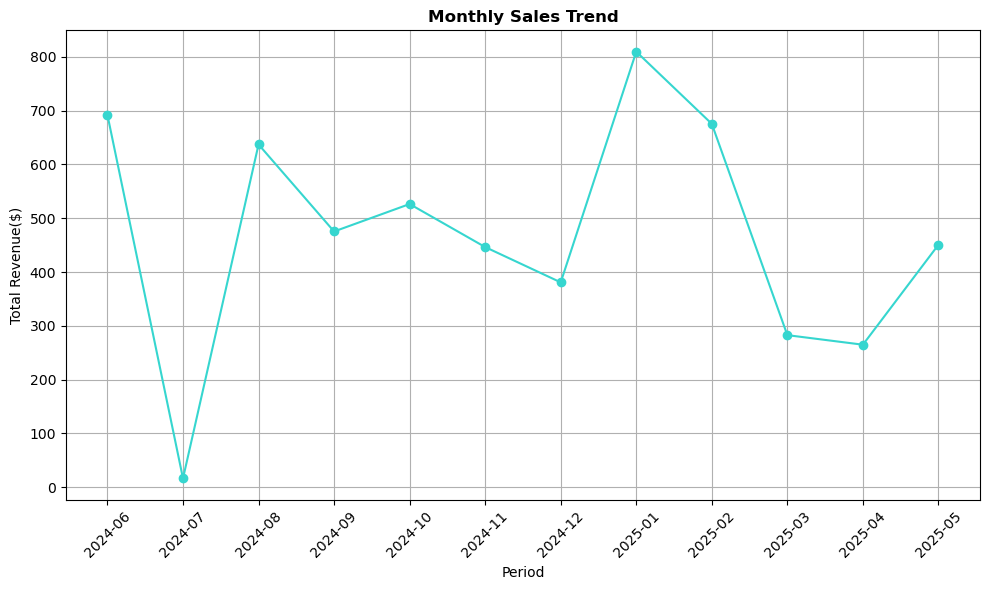

In [72]:
#2. Line Chart to display Sales overt time
monthly_sales = df.groupby(df['Month'])['Total Price'].sum()
months = monthly_sales.index.astype(str)

plt.figure(figsize=(10,6))
plt.plot(months, monthly_sales, marker='o', linestyle='-', color='#36d6cf')
plt.title("Monthly Sales Trend", fontweight="bold")
plt.xlabel("Period")
plt.ylabel("Total Revenue($)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

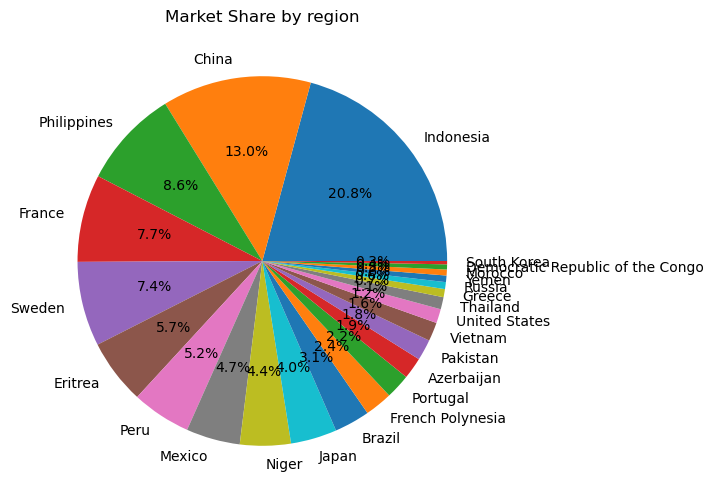

In [77]:
#Pie chart to display market share by region
plt.figure(figsize=(10,6))
plt.pie(region_revenue.values, labels=region_revenue.index, autopct='%1.1f%%',)
plt.title("Market Share by region")
plt.show()

#Avoid Piecharts when the data is crowded else it looks dirty, confusing like below

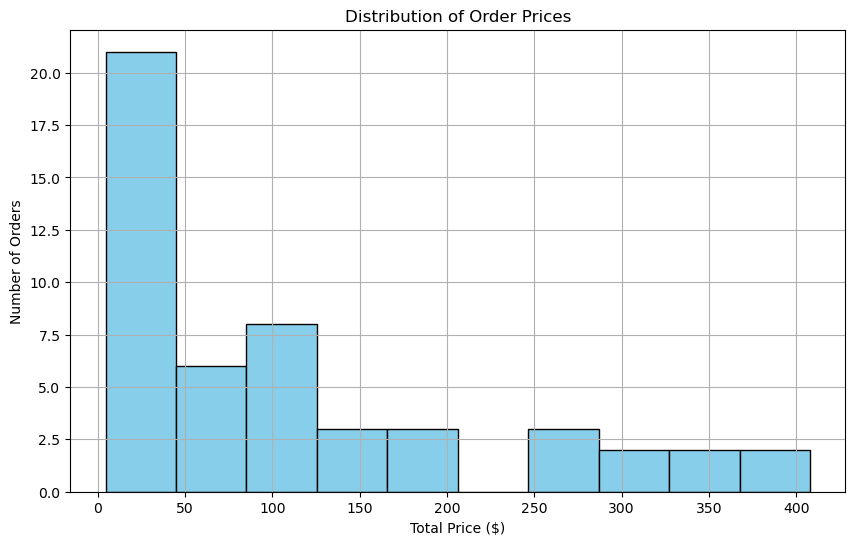

In [80]:
#4.Histogram: Distribution of prices

plt.figure(figsize=(10,6))
plt.hist(df['Total Price'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Order Prices')
plt.xlabel('Total Price ($)')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

/tmp/ipykernel_10102/1412156058.py:22: UserWarning: Glyph 128992 (\N{LARGE ORANGE CIRCLE}) missing from current font.
  plt.tight_layout()
/home/chirag/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128992 (\N{LARGE ORANGE CIRCLE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


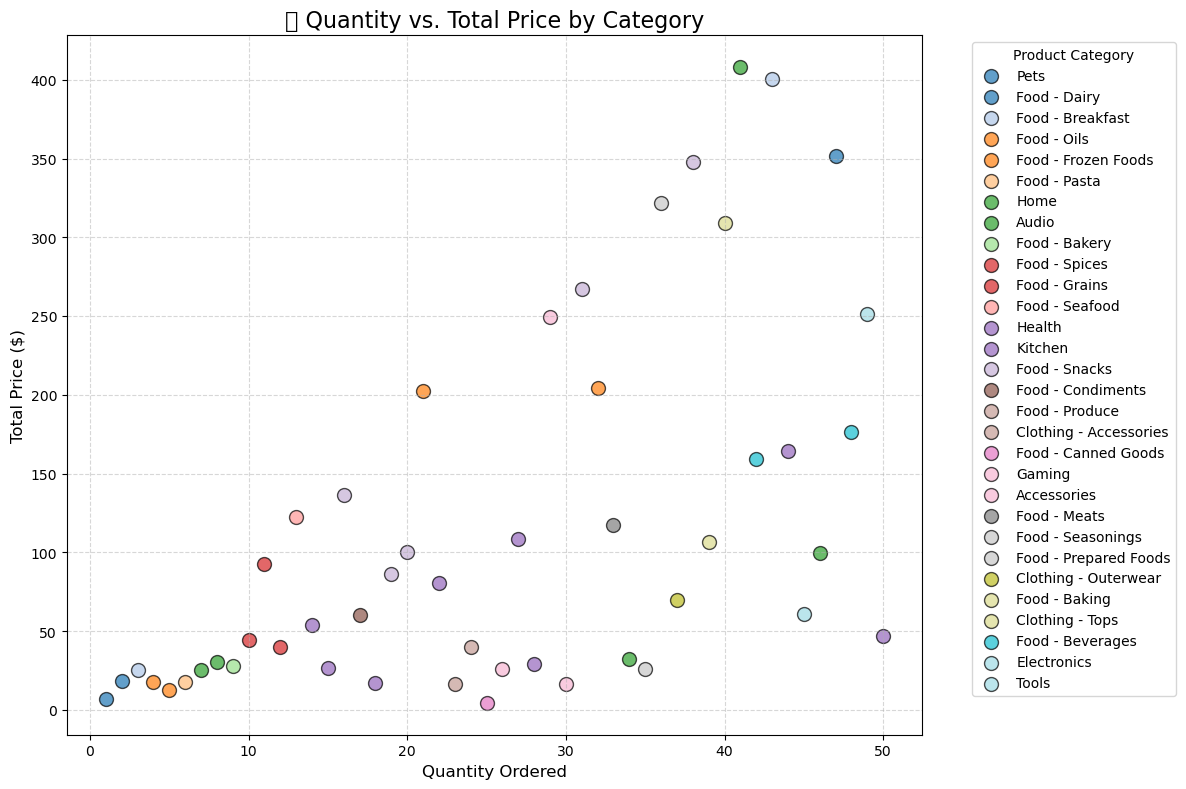

In [83]:
#5.Scatter plot: Quantity vs. Price.
import matplotlib.cm as cm
import matplotlib.colors as mcolors

categories = df['Category'].unique()
colors = cm.tab20(np.linspace(0, 1, len(categories)))
color_map = dict(zip(categories, colors))

plt.figure(figsize=(12, 8))

for category in categories:
    subset = df[df['Category'] == category]
    plt.scatter(subset['Quantity'], subset['Total Price'],
                color=color_map[category], label=category,
                edgecolor='black', alpha=0.7, s=100) 

plt.title("🟠 Quantity vs. Total Price by Category", fontsize=16)
plt.xlabel("Quantity Ordered", fontsize=12)
plt.ylabel("Total Price ($)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="Product Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()